In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import re
import random
from scipy.stats import linregress

In [3]:
# Take in all of our Grocery Store data and read it into pandas
Categories = "Resources_final/Categories_Modified.csv"
Cities = "Resources_final/cities_Modify.csv"
Countries = "Resources_final/countries_Modified.csv"
Customers = "Resources_final/customers_modified.csv"
Employees = "Resources_final/employees_Modified.csv"
Products = "Resources_final/products_Modified.csv"
Sales = "Resources_final/sales_Modified.csv"

products_df = pd.read_csv(Products)
sales_df = pd.read_csv(Sales)
countries_df = pd.read_csv(Countries)
categories_df = pd.read_csv(Categories)
cities_df = pd.read_csv(Cities)

In [4]:
products_df

,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays
0,1,Flour - Whole Wheat,"742,988",3,Medium,21:49.2,Durable,NaN,NaN
1,2,Cookie Chocolate Chip With,"912,329",3,Medium,39:11.0,NaN,NaN,NaN
2,3,Onions - Cippolini,"91,379",9,Medium,11:51.6,Weak,False,111.0
3,4,"Sauce - Gravy, Au Jus, Mix","543,055",9,Medium,46:28.9,Durable,NaN,NaN
4,5,Artichokes - Jerusalem,"654,771",2,Low,13:35.4,Durable,True,27.0
5,6,Wine - Magnotta - Cab Sauv,"797,184",8,High,08:39.7,NaN,NaN,NaN
6,7,Table Cloth - 53x69 Colour,"31,837",9,Medium,14:30.0,Durable,False,NaN
7,8,Halibut - Steaks,"898,573",5,Medium,21:21.9,NaN,True,108.0
8,9,Rabbit - Whole,"844,219",11,Medium,12:04.7,Durable,NaN,NaN
9,10,Scampi Tail,"950,957",4,Low,11:46.0,Weak,True,105.0


In [5]:
sales_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,0,38:25.4,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,0,03:31.1,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,0,31:56.9,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,0,43:55.4,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,0,37:03.9,4BGS0Z5OMAZ8NDAFHHP3


In [6]:
#4.Build a scatter plot identifying total sales revenue per product nationwide[Gargi]

# Merge the first two datasets on ProductID so that no data is lost 
combined_productSales_df = pd.merge(sales_df, products_df,
                                 how='outer', on='ProductID')
# combined_productSales_df["Price"] = pd.to_numeric(combined_productSales_df['Price'],errors='coerce')
combined_productSales_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays
0,1,6,27039,381,7,NaN,0,38:25.4,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0
1,651,2,36984,381,10,0.1,0,10:35.2,XQL4NP8GP3LIJBPC78BR,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0
2,984,18,98474,381,25,0.2,0,51:09.2,W57VJBEIM4PJ99L40VCT,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0
3,1077,14,47778,381,13,0.2,0,51:47.2,JRWW0M7TOFQA29YTPL9Y,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0
4,1396,4,62919,381,16,NaN,0,NaN,DFDKR0C1CPMTNMTHWN9Z,Vaccum Bag 10x13,"442,337",1,High,26:53.6,NaN,NaN,41.0


In [7]:
#combined_productSales_df.head()['Price'][0]
reg = re.compile(',')
#reg.sub('', combined_productSales_df.head()['Price'][0])
combined_productSales_df['Price'] = combined_productSales_df['Price'].apply(lambda s: reg.sub('', s))
combined_productSales_df['Price'] = combined_productSales_df['Price'].astype(float)

In [8]:
#Total Sales Per SalesID
combined_productSales_df["Total Sales"] = combined_productSales_df["Quantity"] * combined_productSales_df["Price"]
combined_productSales_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,Total Sales
0,1,6,27039,381,7,NaN,0,38:25.4,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,442337.0,1,High,26:53.6,NaN,NaN,41.0,3096359.0
1,651,2,36984,381,10,0.1,0,10:35.2,XQL4NP8GP3LIJBPC78BR,Vaccum Bag 10x13,442337.0,1,High,26:53.6,NaN,NaN,41.0,4423370.0
2,984,18,98474,381,25,0.2,0,51:09.2,W57VJBEIM4PJ99L40VCT,Vaccum Bag 10x13,442337.0,1,High,26:53.6,NaN,NaN,41.0,11058425.0
3,1077,14,47778,381,13,0.2,0,51:47.2,JRWW0M7TOFQA29YTPL9Y,Vaccum Bag 10x13,442337.0,1,High,26:53.6,NaN,NaN,41.0,5750381.0
4,1396,4,62919,381,16,NaN,0,NaN,DFDKR0C1CPMTNMTHWN9Z,Vaccum Bag 10x13,442337.0,1,High,26:53.6,NaN,NaN,41.0,7077392.0


In [9]:
#Combine the Total Revenue Per Product
item = combined_productSales_df.groupby(["ProductID", "ProductName", "Price"])

product_unique = item["ProductName"].nunique()
product_unique
sum_quantity = item["Quantity"].sum()
sum_quantity
sum_TotalSales = item["Total Sales"].sum()
sum_TotalSales
price = item["Price"].max()
df = pd.DataFrame({"Quantity": sum_quantity, "Sum Of Total Sales Per Product": sum_TotalSales})
newdfNum = df.reset_index()
newdf = df.reset_index()
newdfNum.head()

,ProductID,ProductName,Price,Quantity,Sum Of Total Sales Per Product
0,1,Flour - Whole Wheat,742988.0,28687,2.131410e+10
1,2,Cookie Chocolate Chip With,912329.0,29248,2.668380e+10
2,3,Onions - Cippolini,91379.0,30386,2.776642e+09
3,4,"Sauce - Gravy, Au Jus, Mix",543055.0,30015,1.629980e+10
4,5,Artichokes - Jerusalem,654771.0,29769,1.949188e+10


In [10]:
#Adding currency to the table above.
sorted_item_price = newdf.sort_values(["Sum Of Total Sales Per Product"], ascending = False)
newdf['Sum Of Total Sales Per Product'] = newdf['Sum Of Total Sales Per Product'].apply(lambda x: f'${x/100:,.2f}')
newdf['Price'] = newdf['Price'].apply(lambda x: f'${x/100:,.2f}')
newdf.head()

,ProductID,ProductName,Price,Quantity,Sum Of Total Sales Per Product
0,1,Flour - Whole Wheat,"$7,429.88",28687,"$213,140,967.56"
1,2,Cookie Chocolate Chip With,"$9,123.29",29248,"$266,837,985.92"
2,3,Onions - Cippolini,$913.79,30386,"$27,766,422.94"
3,4,"Sauce - Gravy, Au Jus, Mix","$5,430.55",30015,"$162,997,958.25"
4,5,Artichokes - Jerusalem,"$6,547.71",29769,"$194,918,778.99"


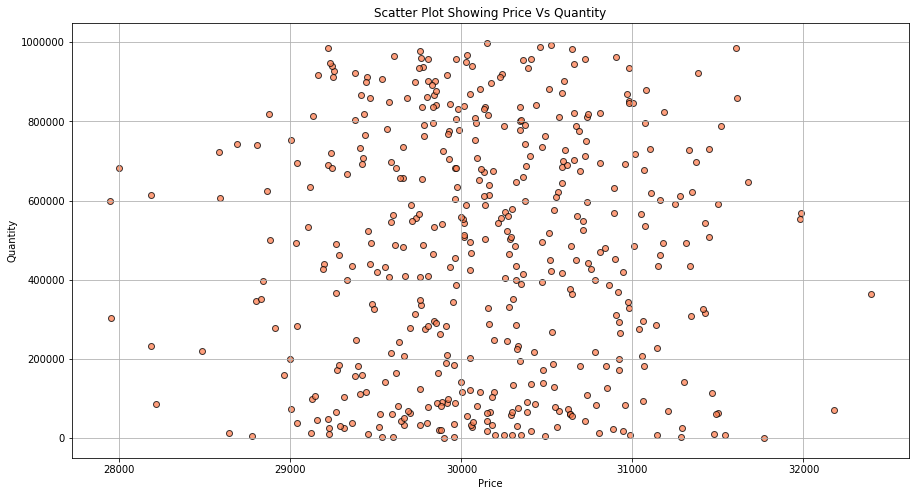

In [19]:
#Price Vs Quantity Sold Scatter Plot Distribution.
plt.figure(figsize=(15, 8))
plt.scatter(x=newdfNum['Quantity'], y=newdfNum['Price'], marker="o", facecolors="coral", edgecolors="black", alpha=0.75)
plt.title('Scatter Plot Showing Price Vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.grid()
plt.savefig("output/Sales_Vs_TotalSales_ScatterPlot.png")

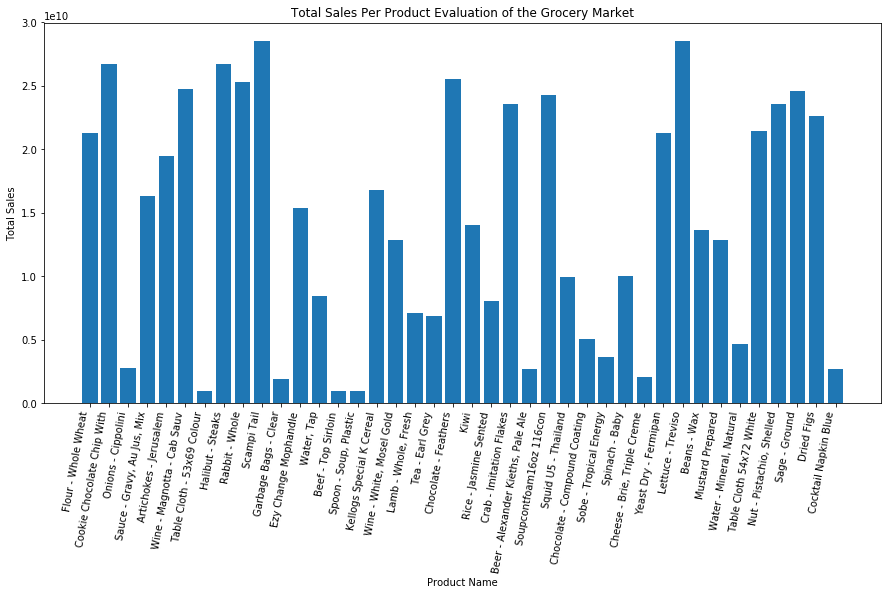

<Figure size 432x288 with 0 Axes>

In [20]:
x = newdfNum['ProductName'][:40]
x_axis = np.arange(len(x))
y = newdfNum['Sum Of Total Sales Per Product'][:40]
y_axis = np.arange(len(y))

plt.figure(figsize=(15, 7))
plt.bar(x, y)
plt.xticks(x, rotation=80, ha='right')
plt.title('Total Sales Per Product Evaluation of the Grocery Market')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.show()
plt.savefig("output/Sales_Vs_TotalSales_BarGraph.png")


In [74]:
#7.Which are perishable to durable products in grocery store.(scatter plot)[Gargi]
products_df
sorted_product_resistance = products_df.sort_values(["Resistant"], ascending = False)
sorted_product_resistance.head()

,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays
211,212,Curry Paste - Madras,"61,746",2,High,52:59.6,Weak,True,97.0
304,305,Pastry - Cheese Baked Scones,"910,997",8,Medium,16:12.9,Weak,True,19.0
360,361,Coffee Decaf Colombian,"364,516",2,Medium,54:23.0,Weak,True,71.0
135,136,Vol Au Vents,"243,913",10,Medium,33:43.5,Weak,True,NaN
239,240,Wine - Chablis 2003 Champs,"708,596",4,Low,57:29.6,Weak,False,NaN


In [75]:
countries_df.head()

,Projects Stabilizing,CountryName,CountryCode
0,1,Armenia,AN
1,2,Canada,FO
2,3,Belize,MK
3,4,Uganda,LV
4,5,Thailand,VI


In [76]:
categories_df.head()

,CategoryID,CategoryName
0,1,Confections
1,2,Shell fish
2,3,Cereals
3,4,Dairy
4,5,Beverages


In [77]:
cities_df.head()

,CityID,CityName,Zipcode,CountryID
0,1,Dayton,80563,32
1,2,Buffalo,17420,32
2,3,Chicago,44751,32
3,4,Fremont,20641,32
4,5,Virginia Beach,62389,32


In [78]:
# combined_productSales_df["Price"] = pd.to_numeric(combined_productSales_df['Price'],errors='coerce')
combined_productSales_df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays,Total Sales
0,1,6,27039,381,7,NaN,0,38:25.4,FQL4S94E4ME1EZFTG42G,Vaccum Bag 10x13,442337.0,1,High,26:53.6,NaN,NaN,41.0,3096359.0
1,651,2,36984,381,10,0.1,0,10:35.2,XQL4NP8GP3LIJBPC78BR,Vaccum Bag 10x13,442337.0,1,High,26:53.6,NaN,NaN,41.0,4423370.0
2,984,18,98474,381,25,0.2,0,51:09.2,W57VJBEIM4PJ99L40VCT,Vaccum Bag 10x13,442337.0,1,High,26:53.6,NaN,NaN,41.0,11058425.0
3,1077,14,47778,381,13,0.2,0,51:47.2,JRWW0M7TOFQA29YTPL9Y,Vaccum Bag 10x13,442337.0,1,High,26:53.6,NaN,NaN,41.0,5750381.0
4,1396,4,62919,381,16,NaN,0,NaN,DFDKR0C1CPMTNMTHWN9Z,Vaccum Bag 10x13,442337.0,1,High,26:53.6,NaN,NaN,41.0,7077392.0
